In [78]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [81]:
sweep = '1h0m1kmv'
log_path = '/usr/bmicnas02/data-biwi-01/jeremy_students/lschlyter/4dflowmri_anomaly_detection/logs/vae/masked_slice'
if sweep:
    log_path = os.path.join(log_path, sweep)
experiments = os.listdir(log_path)
experiments

['20230525-1652_masked_slice_lr5.000e-05-e2-bs3-zdim2888-daFalse',
 '20230525-1655_masked_slice_lr5.000e-05-e2-bs3-zdim2888-daFalse',
 '1h0m1kmv']

In [64]:
n = -5
print(experiments[n])
experiment_path = os.path.join(log_path, experiments[n])
print(experiment_path)

230525_1330_masked_slice_lr1.373e-04-e87-bs2-zdim4928-daTrue
/usr/bmicnas02/data-biwi-01/jeremy_students/lschlyter/4dflowmri_anomaly_detection/logs/vae/masked_slice/230525_1330_masked_slice_lr1.373e-04-e87-bs2-zdim4928-daTrue


In [65]:
inter_results = os.path.join(experiment_path, 'intermediate_results')

In [68]:
list_files_train = os.listdir(inter_results + '/inputs/')
list_files_train[-5:]

['input_image_150_epoch_85.npy',
 'input_image_0_epoch_86.npy',
 'input_image_50_epoch_86.npy',
 'input_image_100_epoch_86.npy',
 'input_image_150_epoch_86.npy']

In [69]:
epoch = 86
image_n = 0
input_ = np.load(os.path.join(inter_results,'inputs', list(filter(lambda x: f'image_{image_n}_epoch_{epoch}' in x, list_files_train))[0]))
out_ = np.load(os.path.join(inter_results,'outputs', list(filter(lambda x: f'image_{image_n}_epoch_{epoch}' in x, list_files_train))[0].replace('input', 'ouput')))



(2, 4, 32, 32, 48) (2, 4, 32, 32, 48)


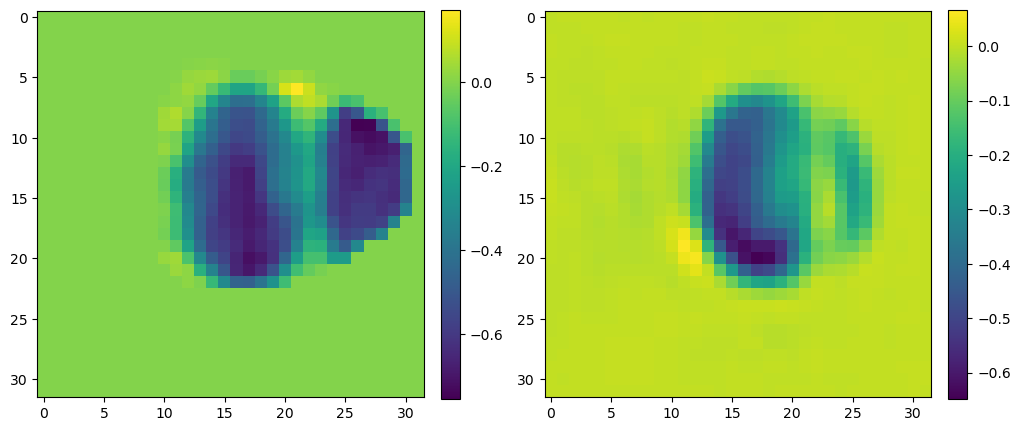

In [77]:
print(input_.shape, out_.shape)
batch_size = 1
time = 3
channel = 1
fig, axs = plt.subplots(1,2, figsize = (12,12))
ax = axs.ravel()
ax[0].imshow(input_[batch_size,channel,:,:,time])
plt.colorbar(ax[0].imshow(input_[batch_size,channel,:,:,time]), fraction=0.046, pad=0.04)
ax[1].imshow(out_[batch_size,channel,:,:,time])
plt.colorbar(ax[1].imshow(out_[batch_size,channel,:,:,time]), fraction=0.046, pad=0.04)